<a href="https://colab.research.google.com/github/Asadsammar/PCVK_TI3I/blob/main/TI3I_Muhammad_Asad_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Make convolution function using algorithms that have been described in Part C, without using
a library or method of convolution of OpenCV. **bold text**

In [9]:
import numpy as np

def convolution(image, kernel):
  image_height, image_width, num_channels = image.shape
  kernel_height, kernel_width = kernel.shape

  if num_channels == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  output = np.zeros(image.shape)

  pad_height = kernel_height // 2
  pad_width = kernel_width // 2

  padded_image = np.zeros((image_height + pad_height*2, image_width + pad_width*2))
  padded_image[pad_height:image_height+pad_height, pad_width:image_width+pad_width] = image

  for i in range(pad_height, image_height + pad_height):
    for j in range(pad_width, image_width + pad_width):
      sum = 0
      for k in range(kernel_height):
        for l in range(kernel_width):
          sum += kernel[k, l] * padded_image[i-pad_height+k, j-pad_width+l]
      output[i-pad_height, j-pad_width] = sum

  return output

**4. Load image, convert to grayscale, define sharpening kernel, call convolution function:**

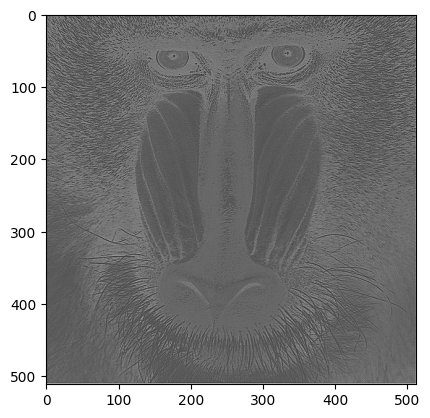

In [8]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/PVCK_images/mandrill.tiff')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

output = convolution(gray, kernel)
plt.imshow(output, cmap='gray')
plt.show()

**5. Implement averaging, low pass, high pass, etc filters:**

In [13]:
# Question 3

# Averaging filter
avg_kernel = np.ones((3,3)) * 1/9

# Low pass filter
low_pass_kernel = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]]) / 9

# High pass filter
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1, 8, -1],
                             [-1, -1, -1]])

# Sharpen filter
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Emboss filter
emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                           [0, 1, 2]])

# Sobel edge detection
sobel_x_kernel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

# Gaussian blur
gaussian_kernel = cv2.getGaussianKernel(21,5)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

**6. Apply filters on image and display results:**

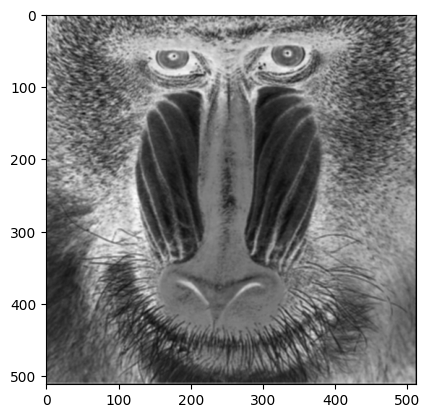

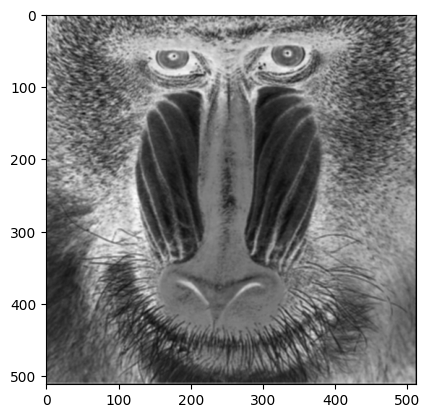

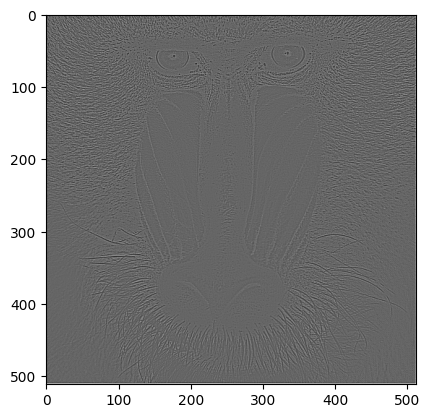

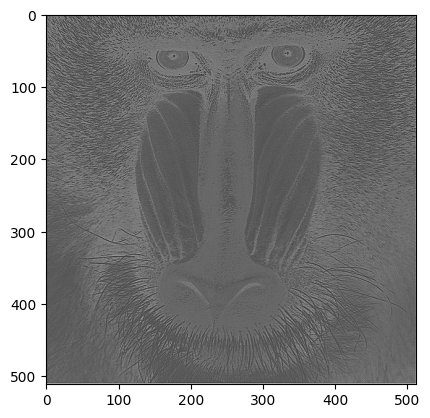

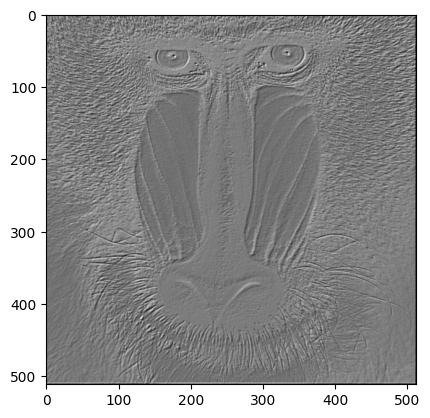

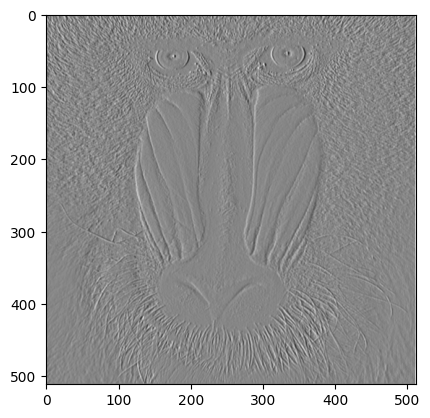

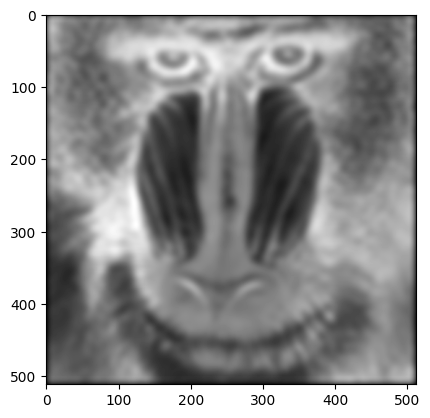

In [15]:
# Question 4
filtered_img1 = convolution(img, avg_kernel)
plt.imshow(filtered_img1, cmap='gray')
plt.show()

filtered_img2 = convolution(img, low_pass_kernel)
plt.imshow(filtered_img2, cmap='gray')
plt.show()

filtered_img3 = convolution(img, high_pass_kernel)
plt.imshow(filtered_img3, cmap='gray')
plt.show()

filtered_img4 = convolution(img, sharpen_kernel)
plt.imshow(filtered_img4, cmap='gray')
plt.show()

filtered_img5 = convolution(img, emboss_kernel)
plt.imshow(filtered_img5, cmap='gray')
plt.show()

filtered_img6 = convolution(img, sobel_x_kernel)
plt.imshow(filtered_img6, cmap='gray')
plt.show()

filtered_img7 = convolution(img, gauss_kernel)
plt.imshow(filtered_img7, cmap='gray')
plt.show()
